In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter
import requests
from bs4 import BeautifulSoup


google_url = 'https://www.google.com.tw/search'  
q = {'q':'世界上最醜的魚'}

r = requests.get(google_url,params = q)


if r.status_code == requests.codes.ok:
    soup = BeautifulSoup(r.text,'html.parser')

   
items = soup.find_all('div', {'class':'kCrYT'})
j = soup.find_all('a')
text = ''
for x in range(0,9):
    text = text + items[x].text
    #print(text)

#text = open('forest.txt', "r",encoding="utf-8").read()
jieba.set_dictionary('dictionary/dict.txt.big.txt')
jieba.load_userdict('dictionary/user_dict.txt')
with open('dictionary/user_dict.txt', 'r', encoding='utf-8') as file:
    stops = file.read().split('\n')
terms = []    

Building prefix dict from C:\Users\ASUS\斷詞與文字雲\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\ASUS\AppData\Local\Temp\jieba.u240f1651e2de593fbe8725d5782fc1ca.cache
Loading model cost 1.769 seconds.
Prefix dict has been built succesfully.


In [2]:
for i in jieba.cut(text, cut_all=False):
    if i not in stops:
        terms.append(i)
diction = Counter(terms)

mask = np.array(Image.open("heart.png"))
font = "C:\\Windows\\Fonts\\msjhbd.ttc"
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)
wordcloud.generate_from_frequencies(diction)

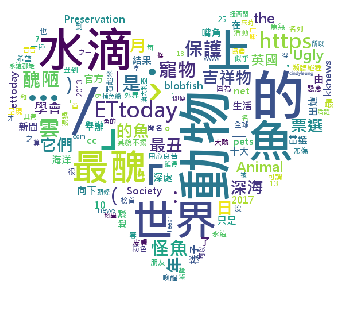

In [3]:
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("chapter4.png")